# Видео 2

## Задача 1
Найдите производные функции:

1. $ y=\dfrac{x}{(1-x)^2(1+x)^3} $
2. $ y=\dfrac{x^p(1-x)^q}{1+x}$ , где $p,\ q$ — константы.

In [2]:
import sympy as sp
x = sp.Symbol('x', real=True)


fy1 = x / (sp.Pow((1-x), 2)*sp.Pow((1+x), 3))
sp.simplify(sp.diff(fy1, x))

(-3*x*(x - 1) - 2*x*(x + 1) + (x - 1)*(x + 1))/((x - 1)**3*(x + 1)**4)

In [3]:
p, q = sp.symbols('p q')
fy2 = (sp.Pow(x,p)*sp.Pow((1-x), q))/(1+x)
sp.simplify(sp.diff(fy2, x))

(-p*x**p*(1 - x)**(q + 1)*(x + 1) + q*x**(p + 1)*(1 - x)**q*(x + 1) + x**(p + 1)*(1 - x)**(q + 1))/(x*(x - 1)*(x + 1)**2)

## Задача 2
Найдите $f'(1)$, если

$ f(x)=x+ (x-1) \arcsin \left(\sqrt{\frac{x}{x+1}}\right)$

с помощью графика (постройте на графике две пересекающихся прямых в необходимой точке) и с помощью аналитического решения.

In [4]:
fy3 = x+(x-1)*sp.asin(sp.sqrt(x/(x+1)))
dfy = sp.simplify(sp.diff(fy3, x))
dfy

(x*(x + 1)**2*(asin(sqrt(x/(x + 1))) + 1)*sqrt(1/(x + 1)) - sqrt(x/(x + 1))*(-x - 1)*(x - 1)/2)/(x*(x + 1)**2*sqrt(1/(x + 1)))

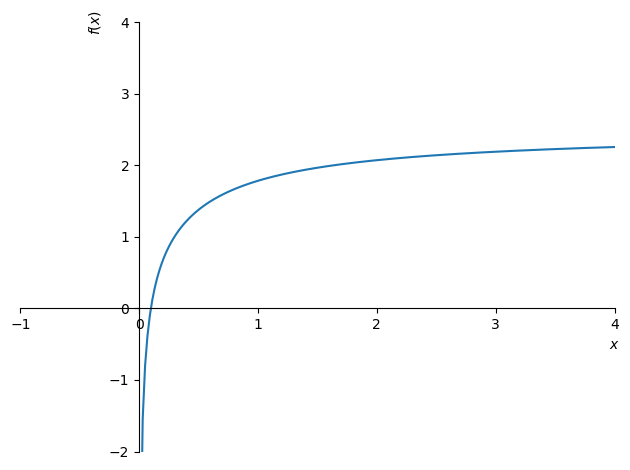

In [5]:
sp.plot(dfy, autoscale = False, ylim=(-2, 4), xlim=(-1, 4))

графически производная в точке 1 равна примерно 1.9

In [6]:
dfy.subs(x,1)
#аналитический результат значительно точнее

pi/4 + 1

## Задача 3
Найдите производную для неявной функции и её значение при $x=2,\ y=4$.

$ x^2 + 2xy - y^2 - 2x = 0$

Найдите касательную к кривой в точке $x=2,\ y=4$ и сравните угол наклона касательной с полученной производной.

In [7]:
y = sp.Symbol('y', real=False)
fy = x**2 + 2*x*y-y**2-2*x
idfy = sp.idiff(fy, y, x)
sp.simplify(idfy)

(-x - y + 1)/(x - y)

In [8]:
k = idfy.subs(y, 4).subs(x, 2)
k

5/2

In [9]:
b = 4-k*2
b

-1

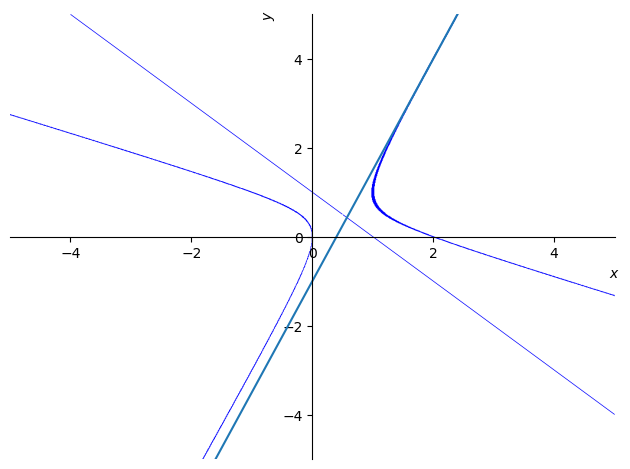

In [10]:
p1 = sp.plot_implicit(idfy, show=False)
p2 = sp.plot(k*x+b, show=False)
p3 = sp.plot_implicit(fy, show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.show()

По графику видно, что касательная действительно проходит в точке (4, 2). 

Угол наклона касательной противоположен углу наклона производной

## Задача 4
Закон движения точки по оси $0x$ задаётся формулой

$x=10t+5t^2$, где $t$ — время в секундах, а $x$ — расстояние в метрах.

Найдите мгновенную скорость движения, когда $t=20$. Вычислите значение численно и аналитически, когда $\Delta t = 0.1$, $\Delta t = 0.01$. Сравните ошибку между аналитическим и численным решением.

In [11]:
t = sp.Symbol('t')
fx = 10*t + 5*t**2

#скорость - производная от расстояния
dfx = sp.diff(fx,t)
dx = sp.simplify(dfx)
dx


10*t + 10

In [12]:
#аналитическое решение
dx.subs(t, 20)


210

In [13]:
#численное решение
dt = sp.Symbol('dt')
#v = (x(t+dt) - x(t))/dt
v = (fx.subs(t, (t + dt)) - fx)/dt
vt = sp.simplify(v)
vt.subs(dt, 0.1).subs(t, 20)

210.500000000000

In [14]:
vt.subs(dt, 0.01).subs(t, 20)

210.050000000000

Ошибка при $\Delta t = 0.1$ 210.5-210 = 0.5

Ошибка при $\Delta t = 0.01$ 210.05-210 = 0.05

# Видео 3


## Задача 1
Найдите $y''$

$y = \tan(x)$.

In [15]:
fy = sp.tan(x)
dfy = sp.simplify(sp.diff(fy,x,2))
dfy


2*tan(x)/cos(x)**2

# Видео 4

## Задача 1
Найдите неопределённый интеграл

$ \int x^2 dx$

и определённый интеграл

$ \int_{-1}^{2} x^2 dx$.

Найдите численно интеграл этой функции и сравните результат, $\Delta x = 0.01$.

In [16]:
y = x**2
dy = sp.integrate(y, x)
dy
#правильнее сюда наверно добавить +С

x**3/3

In [17]:
iv = sp.integrate(y, (x,-1,2))
iv

3

In [18]:
dx = 0.01
n = int(3/dx)
print(n)
sumy = 0
xc = -1
for i in range(0, n):
    sumy += (y.subs(x, xc) * dx)
    xc += dx
sumy

300


2.98505000000001

In [19]:
iv - sumy

0.0149499999999922

погрешность 0.0149499999999922 из-за приближенности метода прямоугольников и достачно большого dx. возможно порядок погрешности данного метода будет зависеть от порядка dx

# Видео 5

## Задача 1
Найдите частную производную
$\dfrac{\partial^6 u}{\partial x^3 \partial y^3}$

$u = x^3 \sin y + y^3 \sin x$.

In [20]:
# x,y = sp.symbols('x y')
from sympy.abc import x, y

u = x**3*sp.sin(y) + y**3*sp.sin(x)
sp.diff(u, x, 3, y, 3)

-6*(cos(x) + cos(y))

## Задача 2

Найдите частные производные для $f = e^x(\cos(y) + x \sin(y))$.

Также постройте график функции в 3D. Подберите адекватные ограничения по осям x и y. Постройте график в 2D, укажите градиент, а также его компоненты в точках $(0,0)$, $(5,1.8)$, $(5.5,-2)$.

In [21]:
f = sp.exp(x)*(sp.cos(y) + x*sp.sin(y))
dfdx = sp.diff(f, x)
dfdy = sp.diff(f, y)
display(dfdx, dfdy)

(x*sin(y) + cos(y))*exp(x) + exp(x)*sin(y)

(x*cos(y) - sin(y))*exp(x)

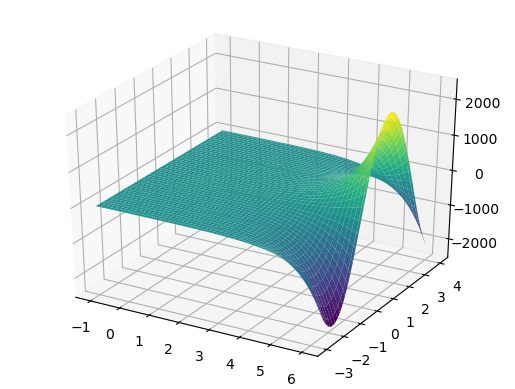

In [22]:
import matplotlib.pyplot as plt
import numpy as np

fig3D = plt.figure()

xc = np.linspace(-1, 6, 100)
yc = np.linspace(-3, 4, 100)
X, Y = np.meshgrid(xc, yc)
F = np.exp(X)*(np.cos(Y) + X*np.sin(Y))
ax = fig3D.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,F, cmap='viridis')

plt.show()

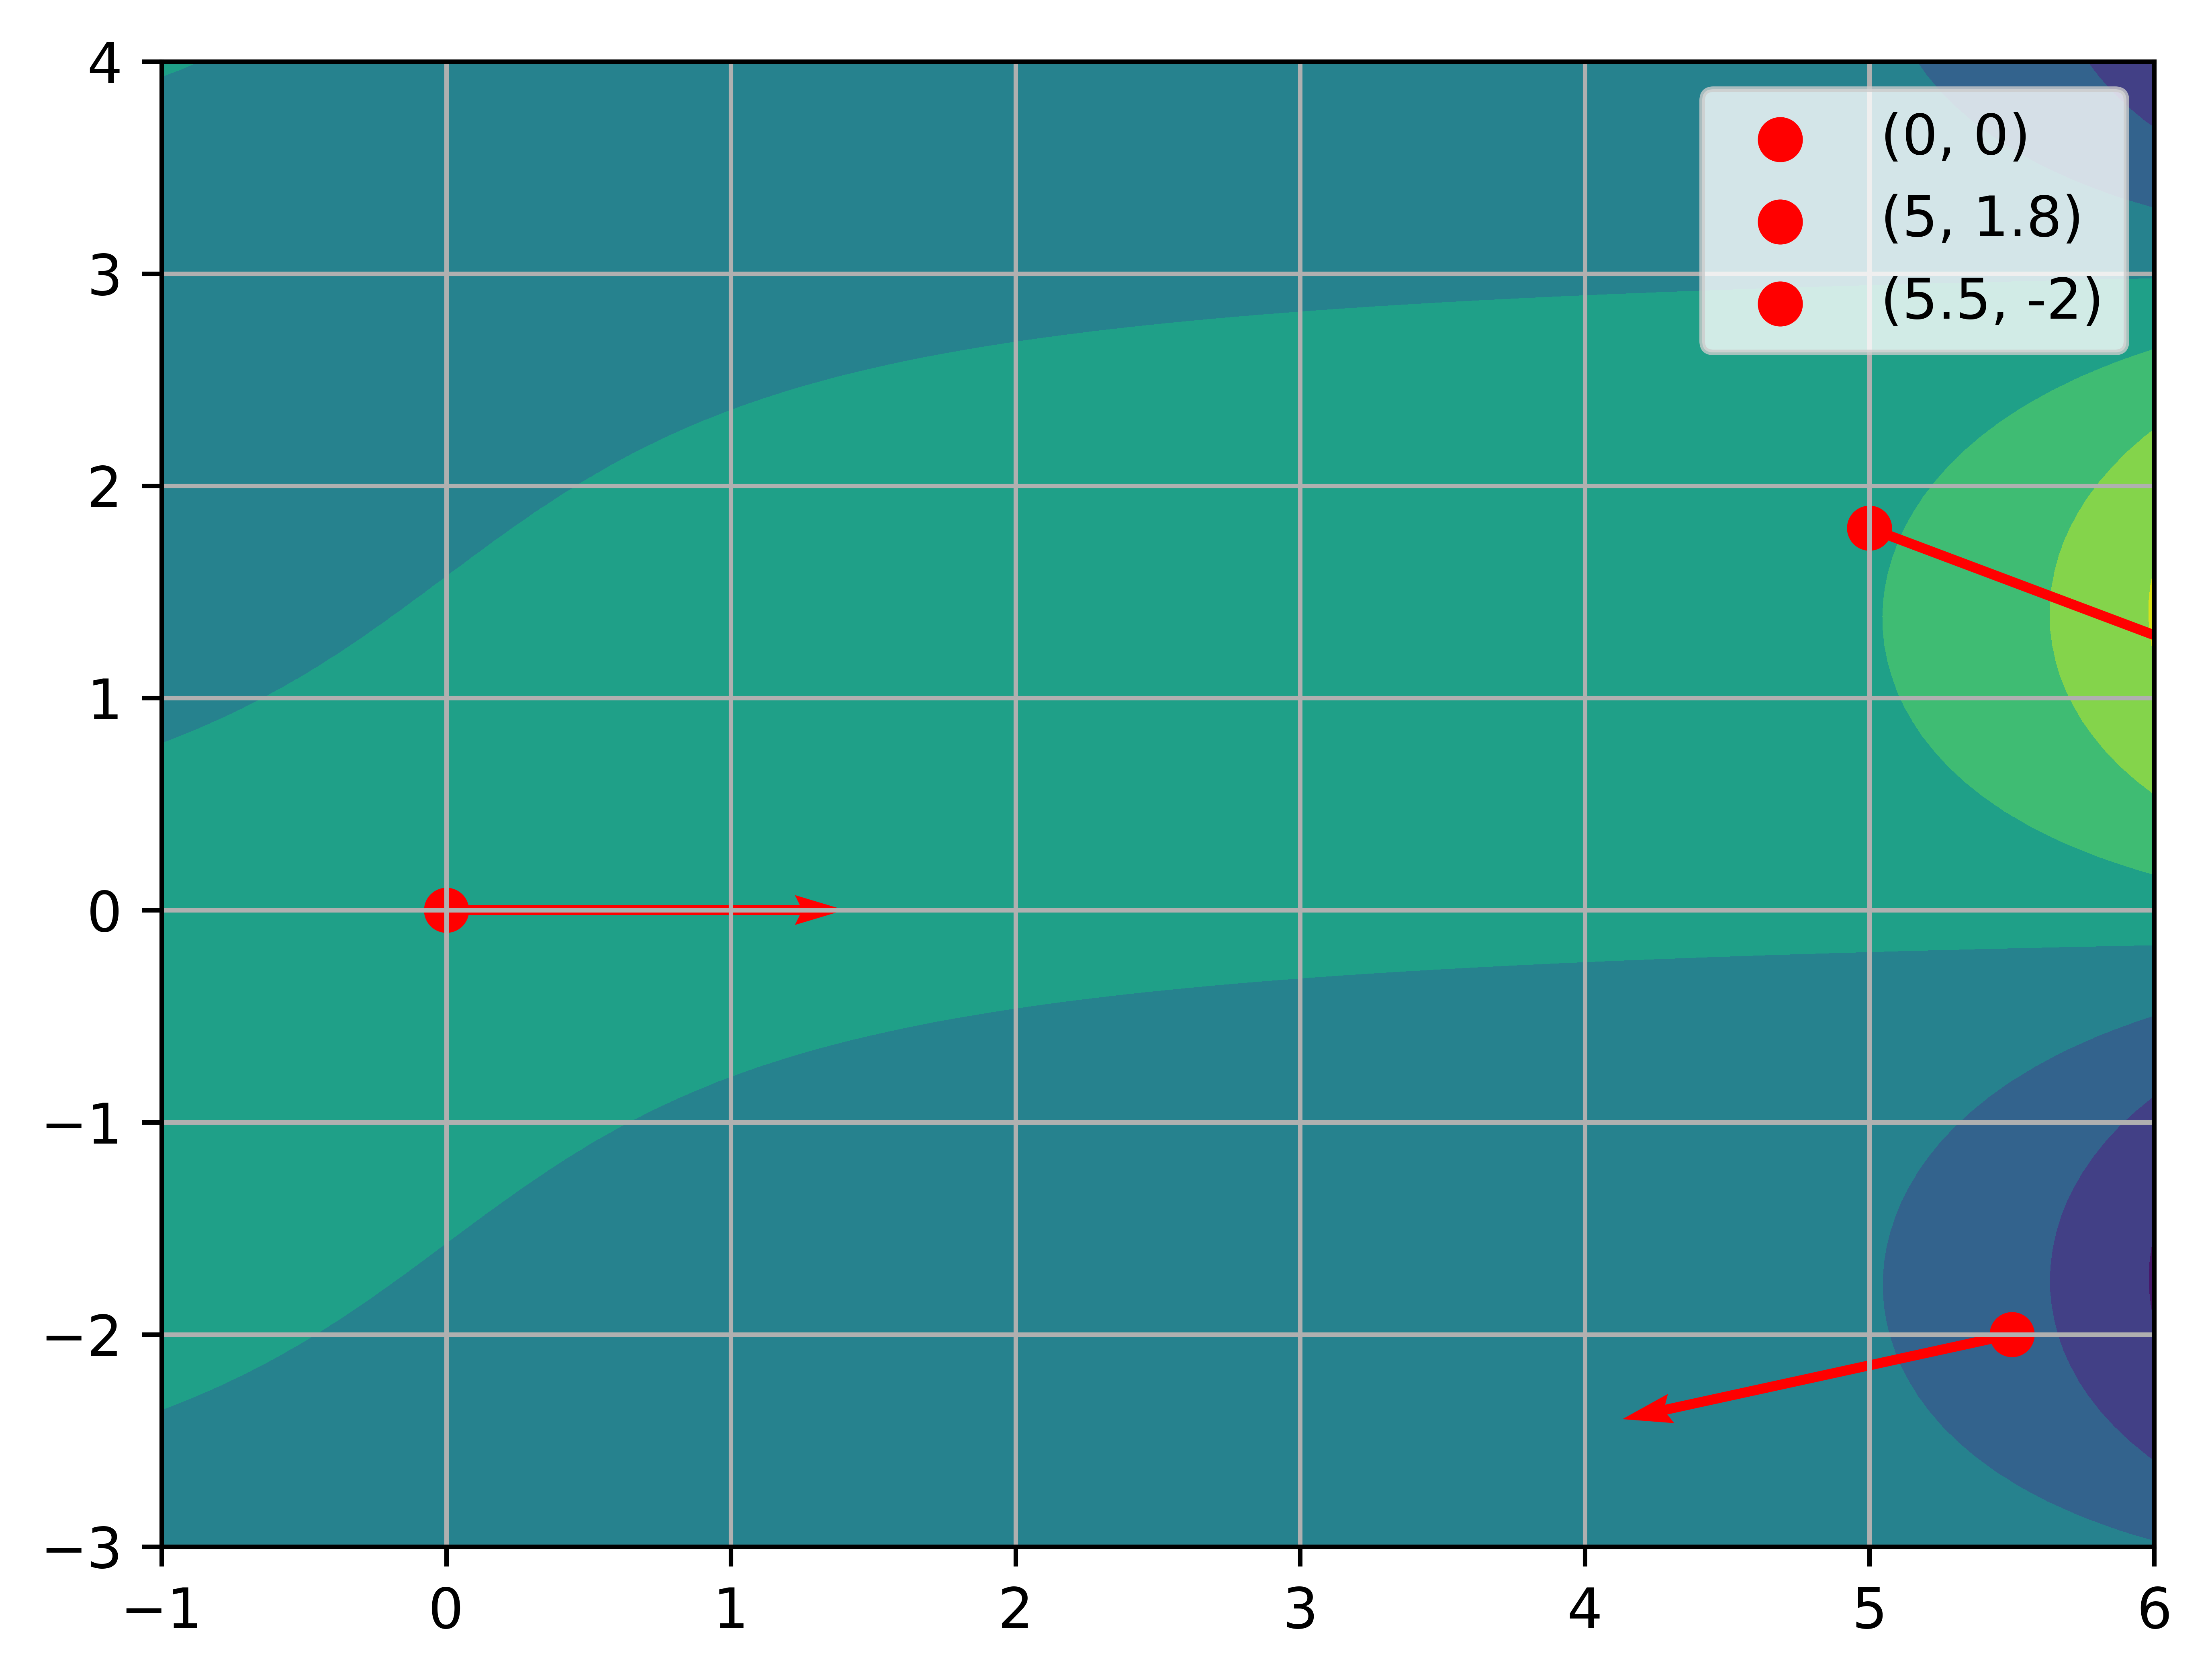

In [23]:
fig2D = plt.figure(dpi=1000)

contour = plt.contourf(X,Y,F)
# plt.colorbar(contour, label='f(x, y)')

points = [(0,0), (5, 1.8), (5.5, -2)]

for (x_p, y_p) in points:
    grad_x = dfdx.subs({'x':x_p, 'y':y_p})
    grad_y = dfdy.subs({'x':x_p, 'y':y_p})
    grad_l = np.sqrt(int(grad_x)**2 + int(grad_y)**2)
    plt.quiver(x_p, y_p, int(grad_x)/grad_l, int(grad_y)/grad_l, color='red', scale=5, width=0.005)
    plt.scatter(x_p, y_p, color='red', s=50, label=f'({x_p}, {y_p})')

plt.legend()
plt.grid()
plt.show()


Вектора показывают направление к наибольшему значению Z. Если сравнить с 3d графиком то выглядит корректно.

## Задача 3
1. Найдите прямую кинематику для данного механизма (обратите внимание на финальную систему координат).
2. Посчитайте матрицу Якоби.


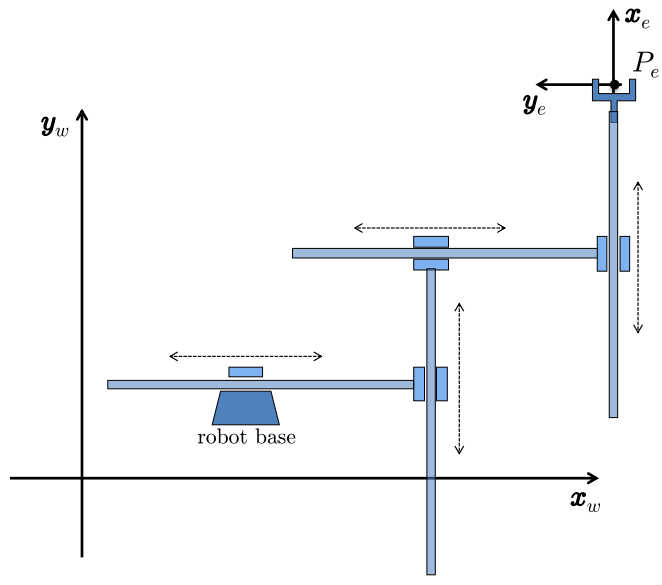import

In [24]:
import math
def rotate(angle, o):
    rez = sp.Matrix()
    if o == 'x':
        rez = sp.Matrix([[1, 0, 0, 0],
                         [0, sp.cos(angle), -sp.sin(angle), 0],
                         [0, sp.sin(angle), sp.cos(angle),0],
                         [0, 0, 0, 1]])
    elif o == 'y':
        rez = sp.Matrix([[sp.cos(angle), 0, sp.sin(angle), 0],
                         [0, 1, 0, 0],
                         [-sp.sin(angle), 0, sp.cos(angle), 0],
                         [0, 0, 0, 1]])
    elif o == 'z':
        rez = sp.Matrix([[sp.cos(angle), -sp.sin(angle), 0, 0],
                         [sp.sin(angle), sp.cos(angle), 0, 0],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1]])
    return rez

def shift(shift, o):
    rez = sp.Matrix()
    if o == 'x':
        rez = sp.Matrix([[1, 0, 0, shift],[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
    elif o == 'y':
        rez = sp.Matrix([[1, 0, 0, 0],[0, 1, 0, shift], [0, 0, 1, 0], [0, 0, 0, 1]])
    elif o == 'z':
        rez = sp.Matrix([[1, 0, 0, 0],[0, 1, 0, 0], [0, 0, 1, shift], [0, 0, 0, 1]])
    return rez

l1, l2, l3, l4, p = sp.symbols('L1 L2 L3 L4 p')

H2 = shift(l1, 'x') * shift(l2, 'y') * shift(l3, 'x') * shift(l4, 'y') * rotate(sp.pi/2, 'z')

H = shift(l1, 'x') * rotate(sp.pi/2, 'z') * shift(l2, 'x') * \
    rotate(-sp.pi/2, 'z') * shift (l3, 'x') * rotate(sp.pi/2, 'z') * shift(l4, 'x')
H

Matrix([
[0, -1, 0, L1 + L3],
[1,  0, 0, L2 + L4],
[0,  0, 1,       0],
[0,  0, 0,       1]])

In [25]:
H2

Matrix([
[0, -1, 0, L1 + L3],
[1,  0, 0, L2 + L4],
[0,  0, 1,       0],
[0,  0, 0,       1]])

In [26]:
f = sp.Matrix(H[0:3, 3])
f

Matrix([
[L1 + L3],
[L2 + L4],
[      0]])

In [27]:
f.jacobian([l1,l2, l3, l4])

Matrix([
[1, 0, 1, 0],
[0, 1, 0, 1],
[0, 0, 0, 0]])

# Видео 6

## Задача 1
Дан маятник Капицы и его дифференциальное уравнение

${\ddot {\varphi }}=-(a\nu ^{2}\cos \nu t+g){\frac {\sin \varphi }{l}}$
, где:
- $\nu$ — частота вынуждающих вертикальных гармонических колебаний подвеса,
- $a$ — амплитуда вынуждающих колебаний,
- $\omega _{0}={\sqrt {g/l}}$ — собственная частота колебаний математического маятника,
- $g$ — ускорение свободного падения,
- $l$ — длина стержня,
-$m$ — масса грузика.

Зависимость координат грузика от времени:
$\left\{{\begin{aligned}x&=l\sin \varphi ,\\y&=-l\cos \varphi -a\cos \nu t.\end{aligned}}\right.$



1. Найдите уравнение движения маятника (численное решение).
2. Постройте графики $y(x)$, $y(t)$, $\dot \varphi(\varphi)$, когда
$a = 0.1$,
$\nu = 25$,
$l = 1$,
$m = 1$,
$\varphi_0 = \pi$,
$\dot \varphi_0 = 0.1$.

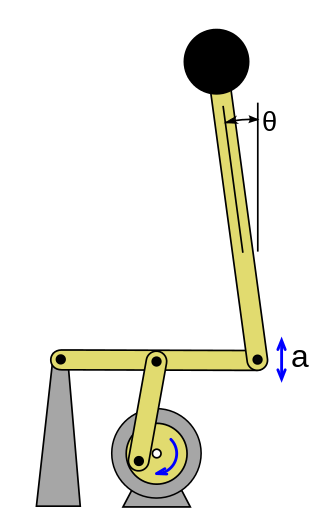

In [186]:
import scipy.integrate

param = {
    'a' : 0.1,
    'nu' : 25.0,
    'g' : 9.8,
    'l' : 1
}

#преобразуем в систему 1-го порядка
def firthPor(t ,y, a, nu, g, l):
    [phi, omega] = y
    dphi_dt = omega #производная от угла = скорость
    domega_dt = -(a*nu**2*np.cos(nu*t) + g)*(np.sin(phi)/l)
    return [dphi_dt, domega_dt]

y0 = [np.pi, 0.1]# начальный угол и скорость из условий

t_span = (0, 100) #временной интервал на котором будет расчёт

t_eval = np.linspace(*t_span, 5000)#точки(dt)

sol = scipy.integrate.solve_ivp(firthPor, t_span, y0, args=tuple(param.values()), t_eval=t_eval, 
                                method='RK45', rtol=1e-10, atol=1e-13)

sol




  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.000e-02 ...  9.998e+01  1.000e+02]
        y: [[ 3.142e+00  3.144e+00 ...  8.935e+00  8.957e+00]
            [ 1.000e-01  1.014e-01 ...  1.272e+00  8.550e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 193574
     njev: 0
      nlu: 0

No handles with labels found to put in legend.


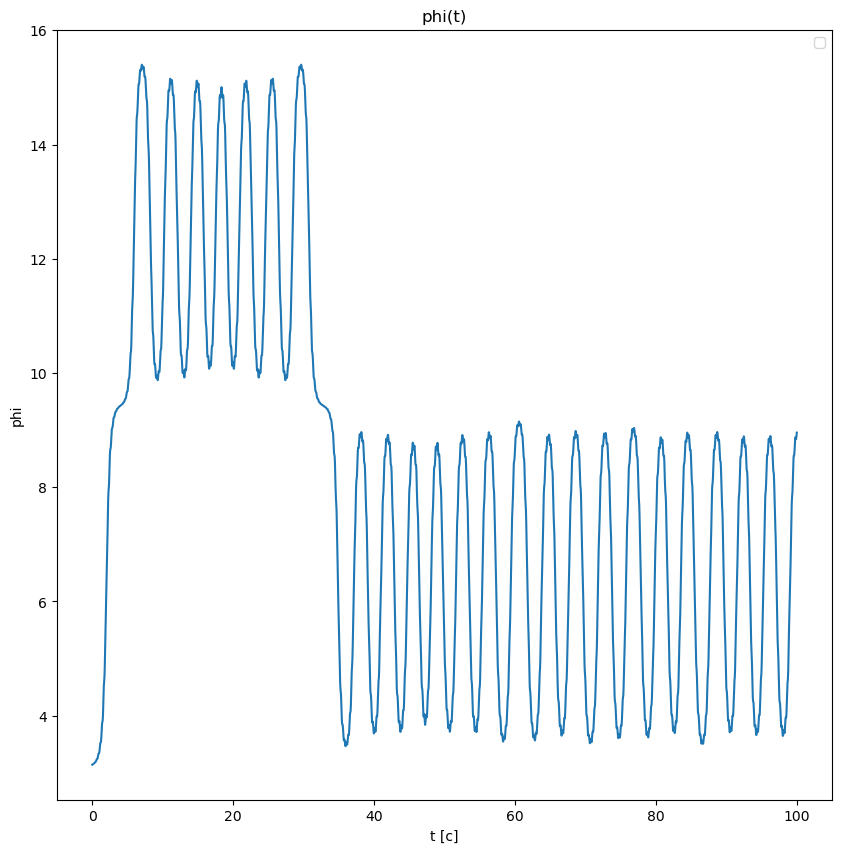

In [187]:
plt.figure(figsize=(10,10))
plt.plot(sol.t, sol.y[0])
plt.xlabel('t [c]')
plt.ylabel('phi')
plt.title('phi(t)')
plt.legend()
plt.show()

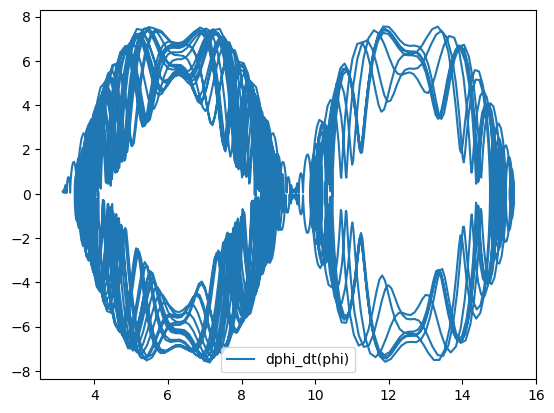

In [188]:
plt.plot(sol.y[0], sol.y[1], label='dphi_dt(phi)')
plt.legend()

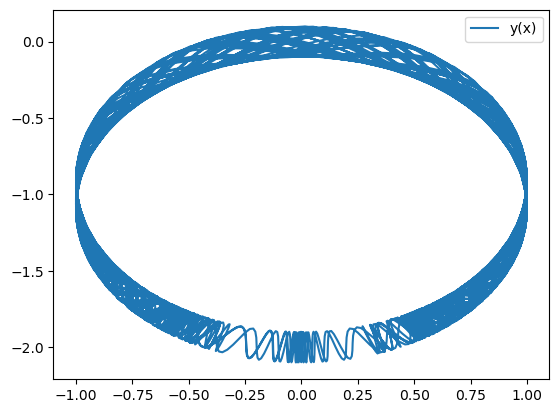

In [191]:
def x_y(phi, a, nu, l, t):
    x = l*np.sin(phi)
    y = -l+np.cos(phi) + a*np.cos(nu*t)
    return [x,y]

[x0, y0] = x_y(sol.y[0], param['a'], param['nu'], param['l'], sol.t)

plt.plot(x0,y0, label='y(x)')
plt.legend()
plt.show()

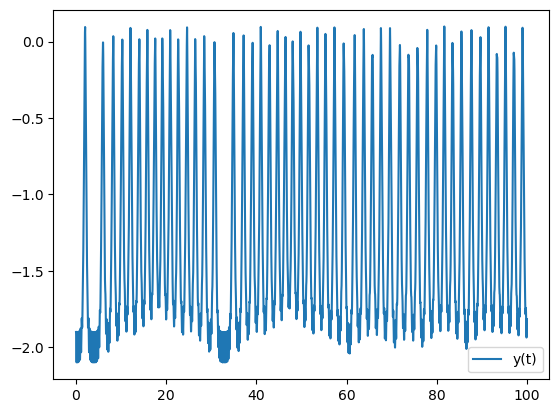

In [192]:
plt.plot(sol.t,y0, label='y(t)')
plt.legend()
plt.show()